In [166]:
import numpy as np
from random import randrange, choice
from sklearn.neighbors import NearestNeighbors
import pandas as pd
#referring to https://stats.stackexchange.com/questions/215938/generate-synthetic-data-to-match-sample-data


df = pd.read_csv("Dataset")
df = df.iloc[:,2:] # this gives me df, the final Dataframe which I would like to generate a larger dataset based on. This is the smaller Dataframe with 21000x102 dimensions.


def SMOTE(T, N, k):
# """
# Returns (N/100) * n_minority_samples synthetic minority samples.
#
# Parameters
# ----------
# T : array-like, shape = [n_minority_samples, n_features]
#     Holds the minority samples
# N : percetange of new synthetic samples:
#     n_synthetic_samples = N/100 * n_minority_samples. Can be < 100.
# k : int. Number of nearest neighbours.
#
# Returns
# -------
# S : array, shape = [(N/100) * n_minority_samples, n_features]
# """'float' object cannot be interpreted as an integer

    n_minority_samples, n_features = T.shape

    if N < 100:
       #create synthetic samples only for a subset of T.
       #TODO: select random minortiy samples
       N = 100

       pass

    if (N % 100) != 0:
       raise ValueError("N must be < 100 or multiple of 100")

    N = N/100
    n_synthetic_samples = N * n_minority_samples
    n_synthetic_samples = int(n_synthetic_samples)
    n_features = int(n_features)
    S = np.zeros(shape=(n_synthetic_samples, n_features))

    #Learn nearest neighbours
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(T)
    N= int(N)
    print(N)
    #Calculate synthetic samples
    for i in range(n_minority_samples):
       nn = neigh.kneighbors(T[i].reshape(1, -1), return_distance=False)
       for n in range(N):
          nn_index = choice(nn[0])
          #NOTE: nn includes T[i], we don't want to select it
          while nn_index == i:
             nn_index = choice(nn[0])

          dif = T[nn_index] - T[i]
          gap = np.random.random()
          S[n + i * N, :] = T[i,:] + gap * dif[:]

    return S

df = df.to_numpy()
new_data = SMOTE(df,50000,5) # this is where I call the function and expect new_data to be generated with larger number of samples than original df.

500


In [172]:
len(new_data)

3000

In [36]:
df = pd.DataFrame(df)

In [37]:
df

,0,1,2,3
0,49.5037,26.7716,23.7246,14.5
1,38.7968,31.3618,29.8414,8.5
2,47.7549,26.2457,25.9994,15.2
3,44.1609,29.5993,26.2399,9.5
4,42.2324,30.6757,27.0919,6.3
5,54.6478,25.8109,19.5413,15.2


In [173]:
new_data_df = pd.DataFrame(new_data)

In [39]:
len(new_data_df)

30

In [40]:
new_data_df.describe()

,0,1,2,3
count,30.000000,30.000000,30.000000,30.000000
mean,45.601791,28.630128,25.768084,11.126993
std,3.759890,1.704462,2.207767,2.737431
min,39.355083,25.855875,20.209316,6.601871
25%,42.831514,27.420736,24.633874,8.657251
50%,45.603622,28.374828,26.107987,11.367696
75%,48.631948,30.152260,26.899105,13.182094
max,53.934809,31.176062,29.522456,15.200000


In [41]:
covariance = np.cov(df, new_data_df)

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 6 artists>

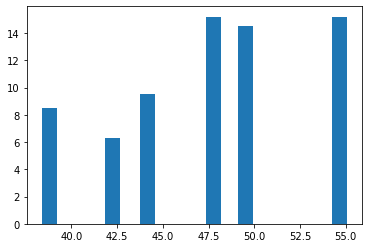

In [60]:
plt.bar(df[0], df[3])

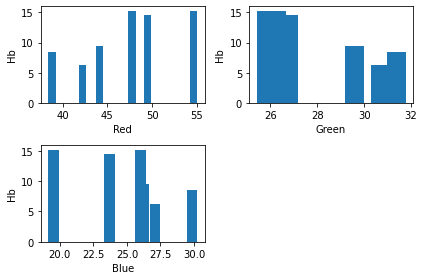

In [68]:
plt.subplot(2,2,1)
plt.bar(df[0],df[3])
plt.xlabel("Red")
plt.ylabel("Hb")
plt.subplot(2,2,2)
plt.bar(df[1],df[3])
plt.xlabel("Green")
plt.ylabel("Hb")
plt.subplot(2,2,3)
plt.bar(df[2],df[3])
plt.xlabel("Blue")
plt.ylabel("Hb")
plt.tight_layout()

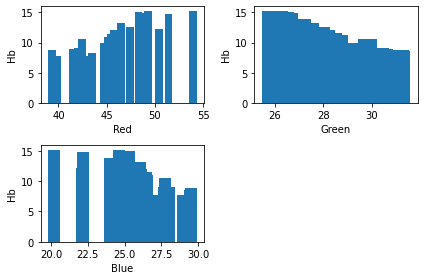

In [67]:
plt.subplot(2,2,1)
plt.bar(new_data_df[0],new_data_df[3])
plt.xlabel("Red")
plt.ylabel("Hb")
plt.subplot(2,2,2)
plt.bar(new_data_df[1],new_data_df[3])
plt.xlabel("Green")
plt.ylabel("Hb")
plt.subplot(2,2,3)
plt.bar(new_data_df[2],new_data_df[3])
plt.xlabel("Blue")
plt.ylabel("Hb")
plt.tight_layout()

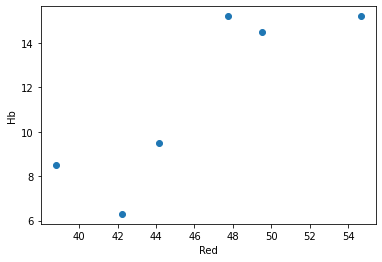

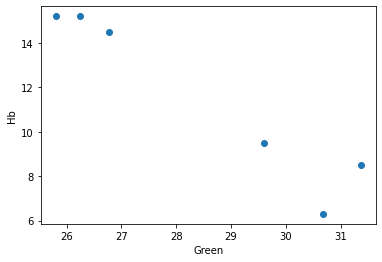

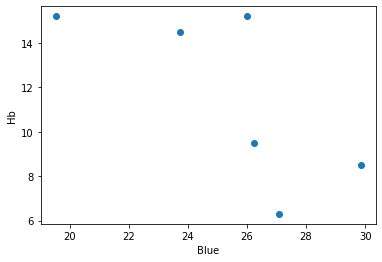

In [74]:
x = df[0]
y = df[3]
plt.scatter(x, y)
plt.xlabel("Red")
plt.ylabel("Hb")
plt.show()
x = df[1]
y = df[3]
plt.scatter(x, y)
plt.xlabel("Green")
plt.ylabel("Hb")
plt.show()

x = df[2]
y = df[3]
plt.scatter(x, y)
plt.xlabel("Blue")
plt.ylabel("Hb")
plt.show()

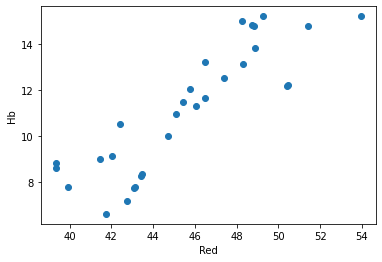

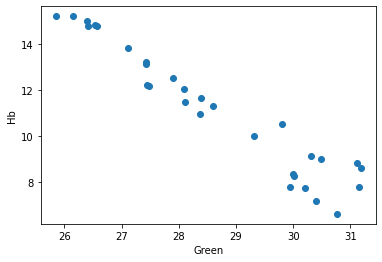

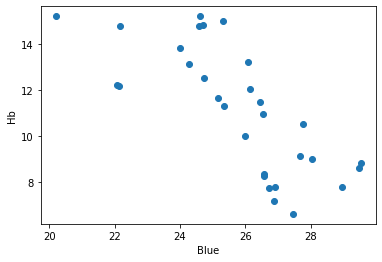

In [75]:
x = new_data_df[0]
y = new_data_df[3]
plt.scatter(x, y)
plt.xlabel("Red")
plt.ylabel("Hb")
plt.show()
x = new_data_df[1]
y = new_data_df[3]
plt.scatter(x, y)
plt.xlabel("Green")
plt.ylabel("Hb")
plt.show()
x = new_data_df[2]
y = new_data_df[3]
plt.scatter(x, y)
plt.xlabel("Blue")
plt.ylabel("Hb")
plt.show()

In [143]:
import seaborn as sns

In [146]:
sns.set_style('whitegrid')

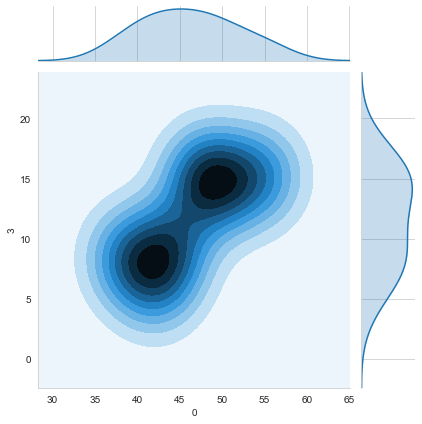

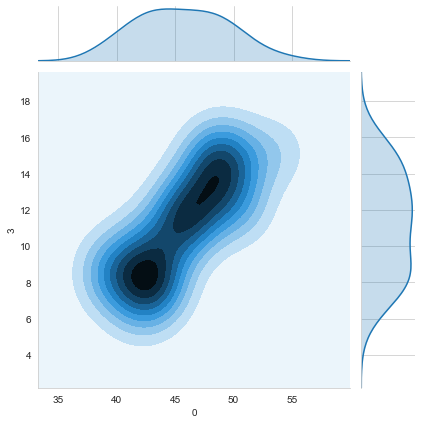

In [147]:
sns.jointplot(x=0, y =3, data = df, kind='kde')
sns.jointplot(x=0, y =3, data = new_data_df, kind='kde')

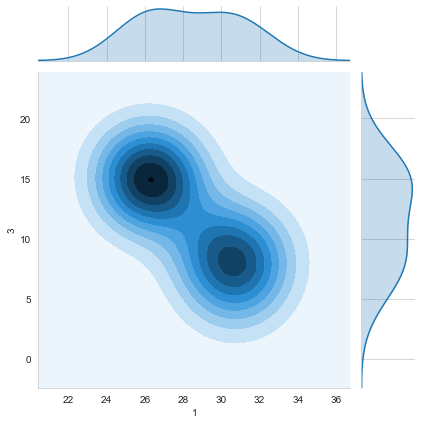

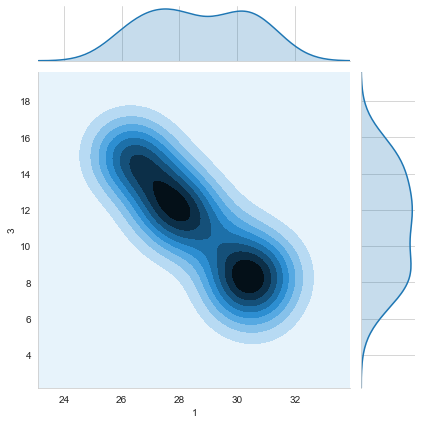

In [148]:
sns.jointplot(x=1, y =3, data = df, kind='kde')
sns.jointplot(x=1, y =3, data = new_data_df, kind='kde')

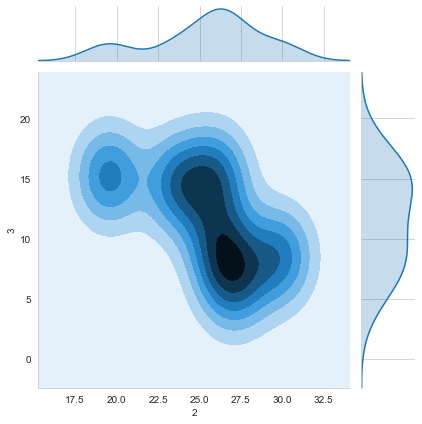

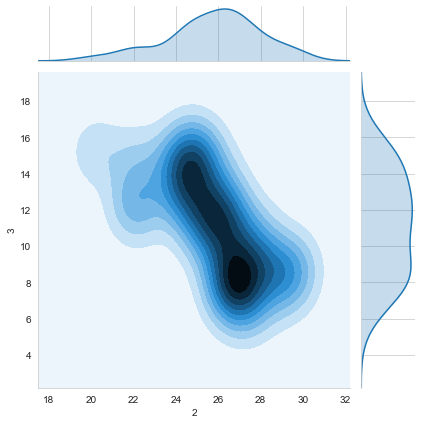

In [149]:
sns.jointplot(x=2, y =3, data = df, kind='kde')
sns.jointplot(x=2, y =3, data = new_data_df, kind='kde')

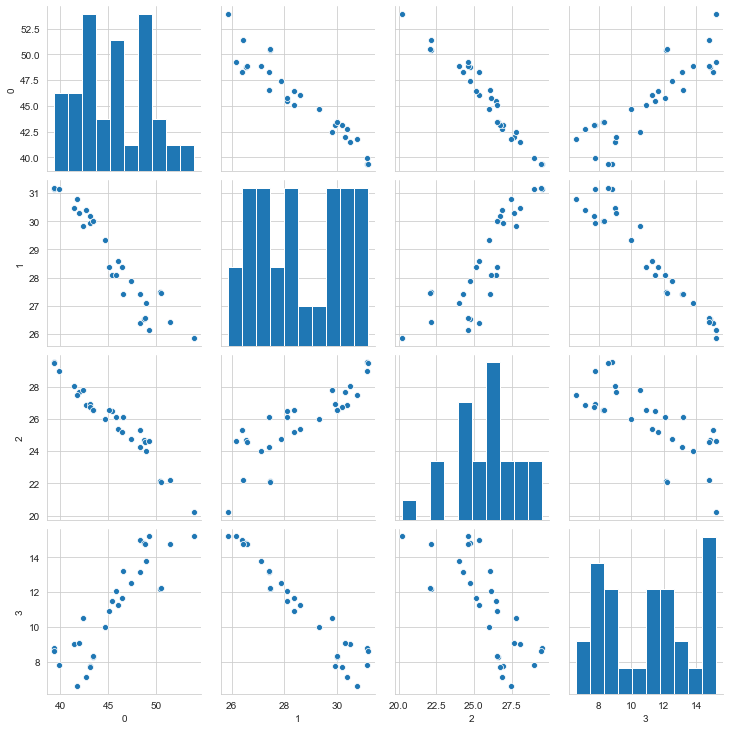

In [150]:
sns.pairplot(new_data_df)


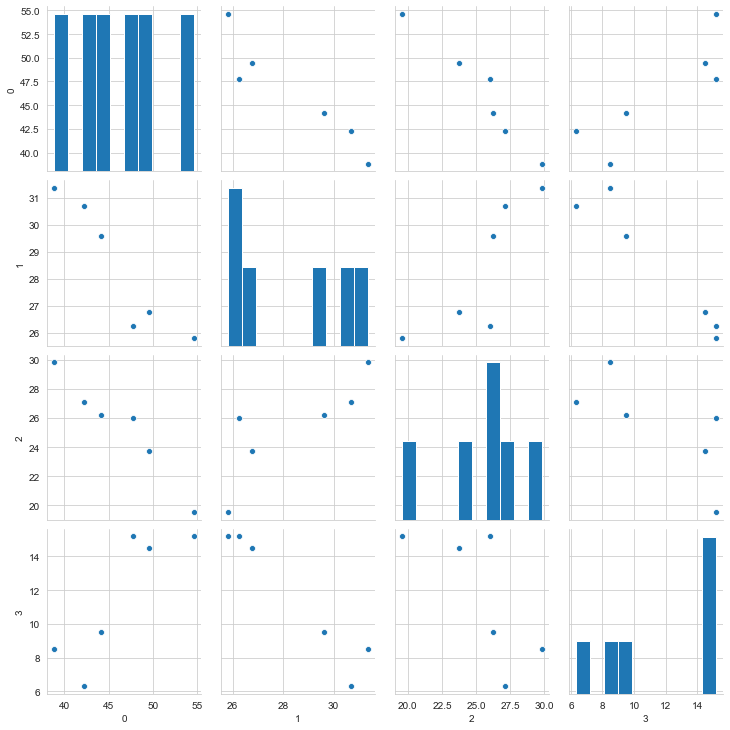

In [156]:
sns.pairplot(df)

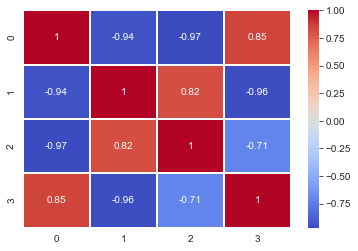

In [151]:
crr = df.corr()
sns.heatmap(crr, annot= True, cmap = 'coolwarm',linewidths=1)


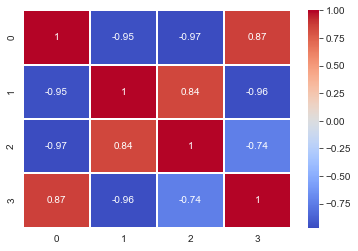

In [152]:
crr_new = new_data_df.corr()
sns.heatmap(crr_new, annot= True, cmap='coolwarm',linewidths=1)

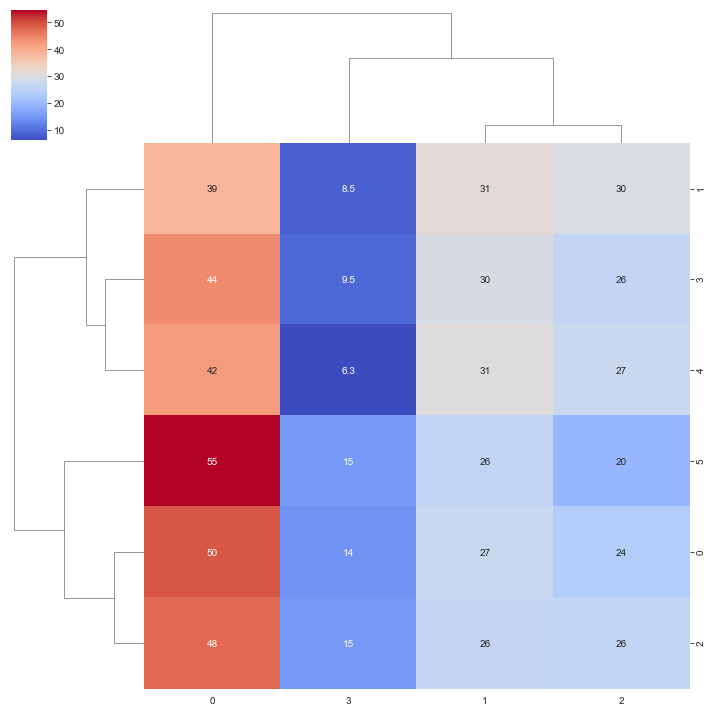

In [153]:
sns.clustermap(df,cmap = 'coolwarm',annot = True)

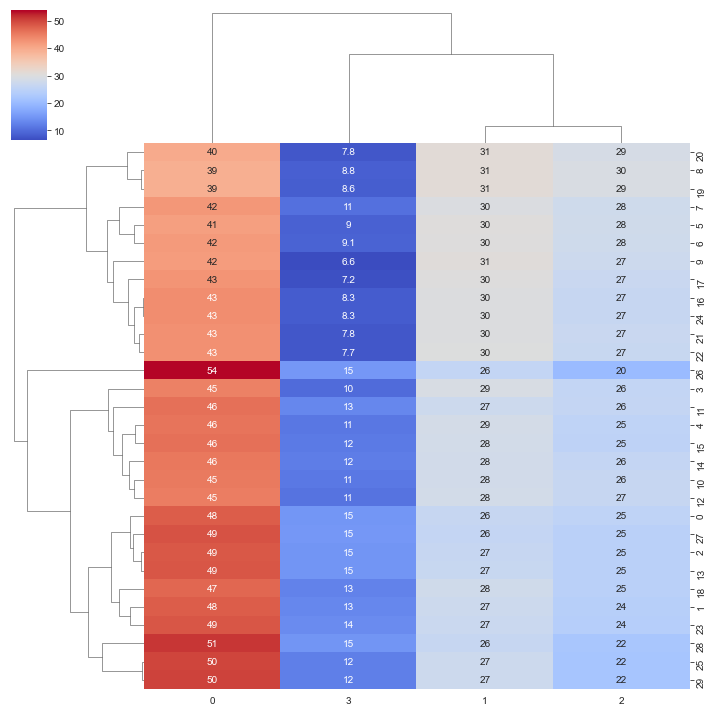

In [154]:
sns.clustermap(new_data_df,cmap = 'coolwarm',annot = True)

In [174]:
new_data_df.to_csv('new_data')

In [175]:
df = pd.read_csv("new_data")
len(df)

3000

In [170]:
df

,Unnamed: 0,Name,Red,Green,Blue,Hb (g/dl)
0,0,Subject 1,49.5037,26.7716,23.7246,14.5
1,1,Subject 2,38.7968,31.3618,29.8414,8.5
2,2,Subject 3,47.7549,26.2457,25.9994,15.2
3,3,Subject 4,44.1609,29.5993,26.2399,9.5
4,4,Subject 5,42.2324,30.6757,27.0919,6.3
5,5,Subject 6,54.6478,25.8109,19.5413,15.2


In [161]:
df = df.iloc[:,2:] 

In [162]:
df

,Red,Green,Blue,Hb (g/dl)
0,49.5037,26.7716,23.7246,14.5
1,38.7968,31.3618,29.8414,8.5
2,47.7549,26.2457,25.9994,15.2
3,44.1609,29.5993,26.2399,9.5
4,42.2324,30.6757,27.0919,6.3
5,54.6478,25.8109,19.5413,15.2
